In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.isnull().sum()
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8718232044198895

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905


Confusion Matrix:
 [[743  64]
 [ 52  46]]


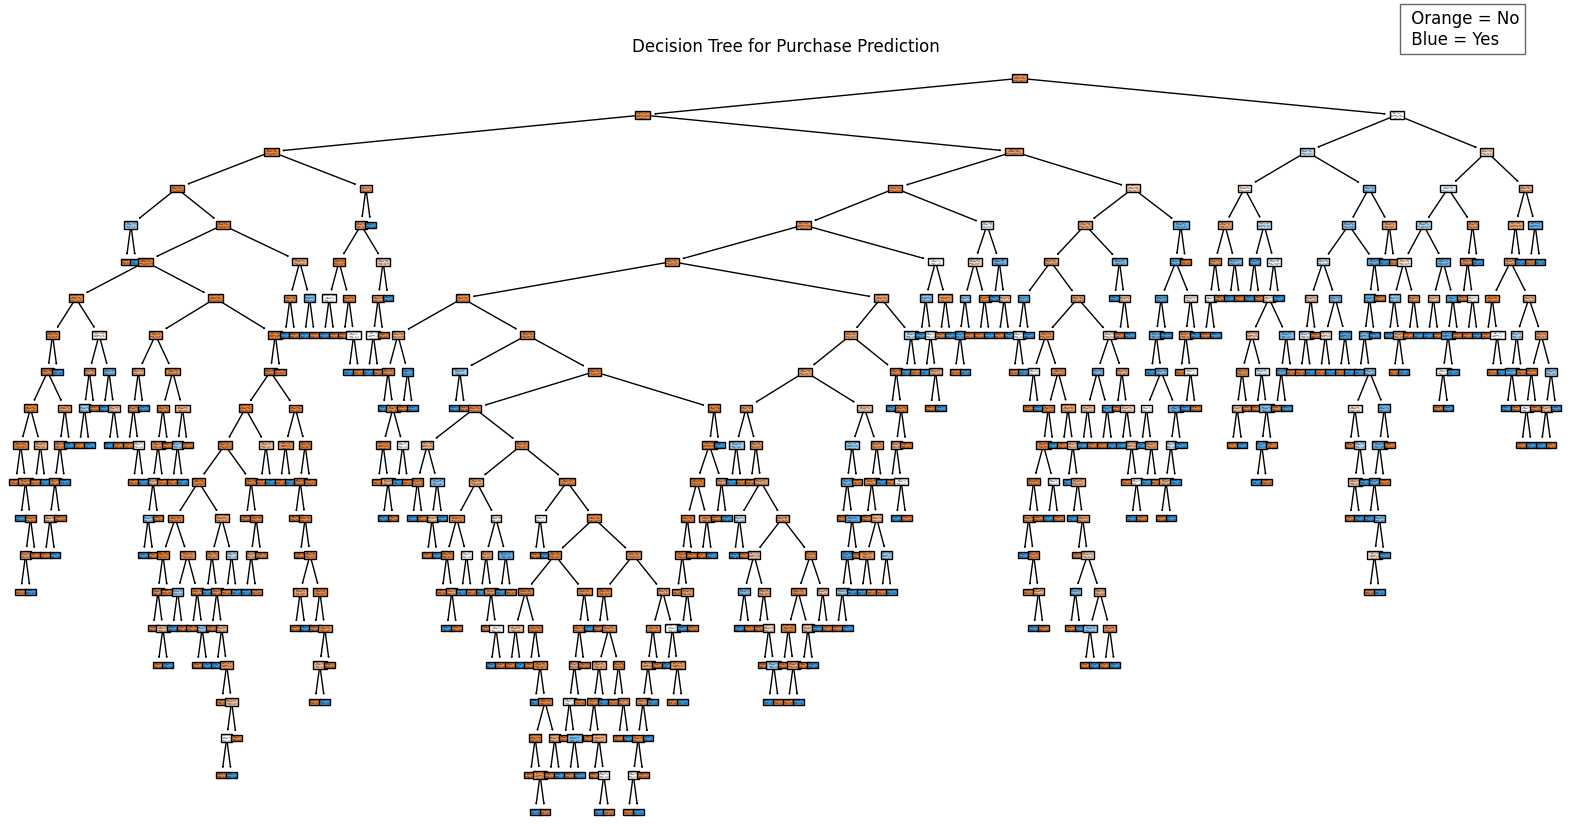

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.text(0.9, 1.02, ' Orange = No\n Blue = Yes', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.title("Decision Tree for Purchase Prediction")
plt.show()

In [ ]:
sns.set(style="whitegrid")

# Get all categorical columns (object type)
cat_cols = df.select_dtypes(include='object').columns

# Loop through and plot each
for feature in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df, palette='Reds')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

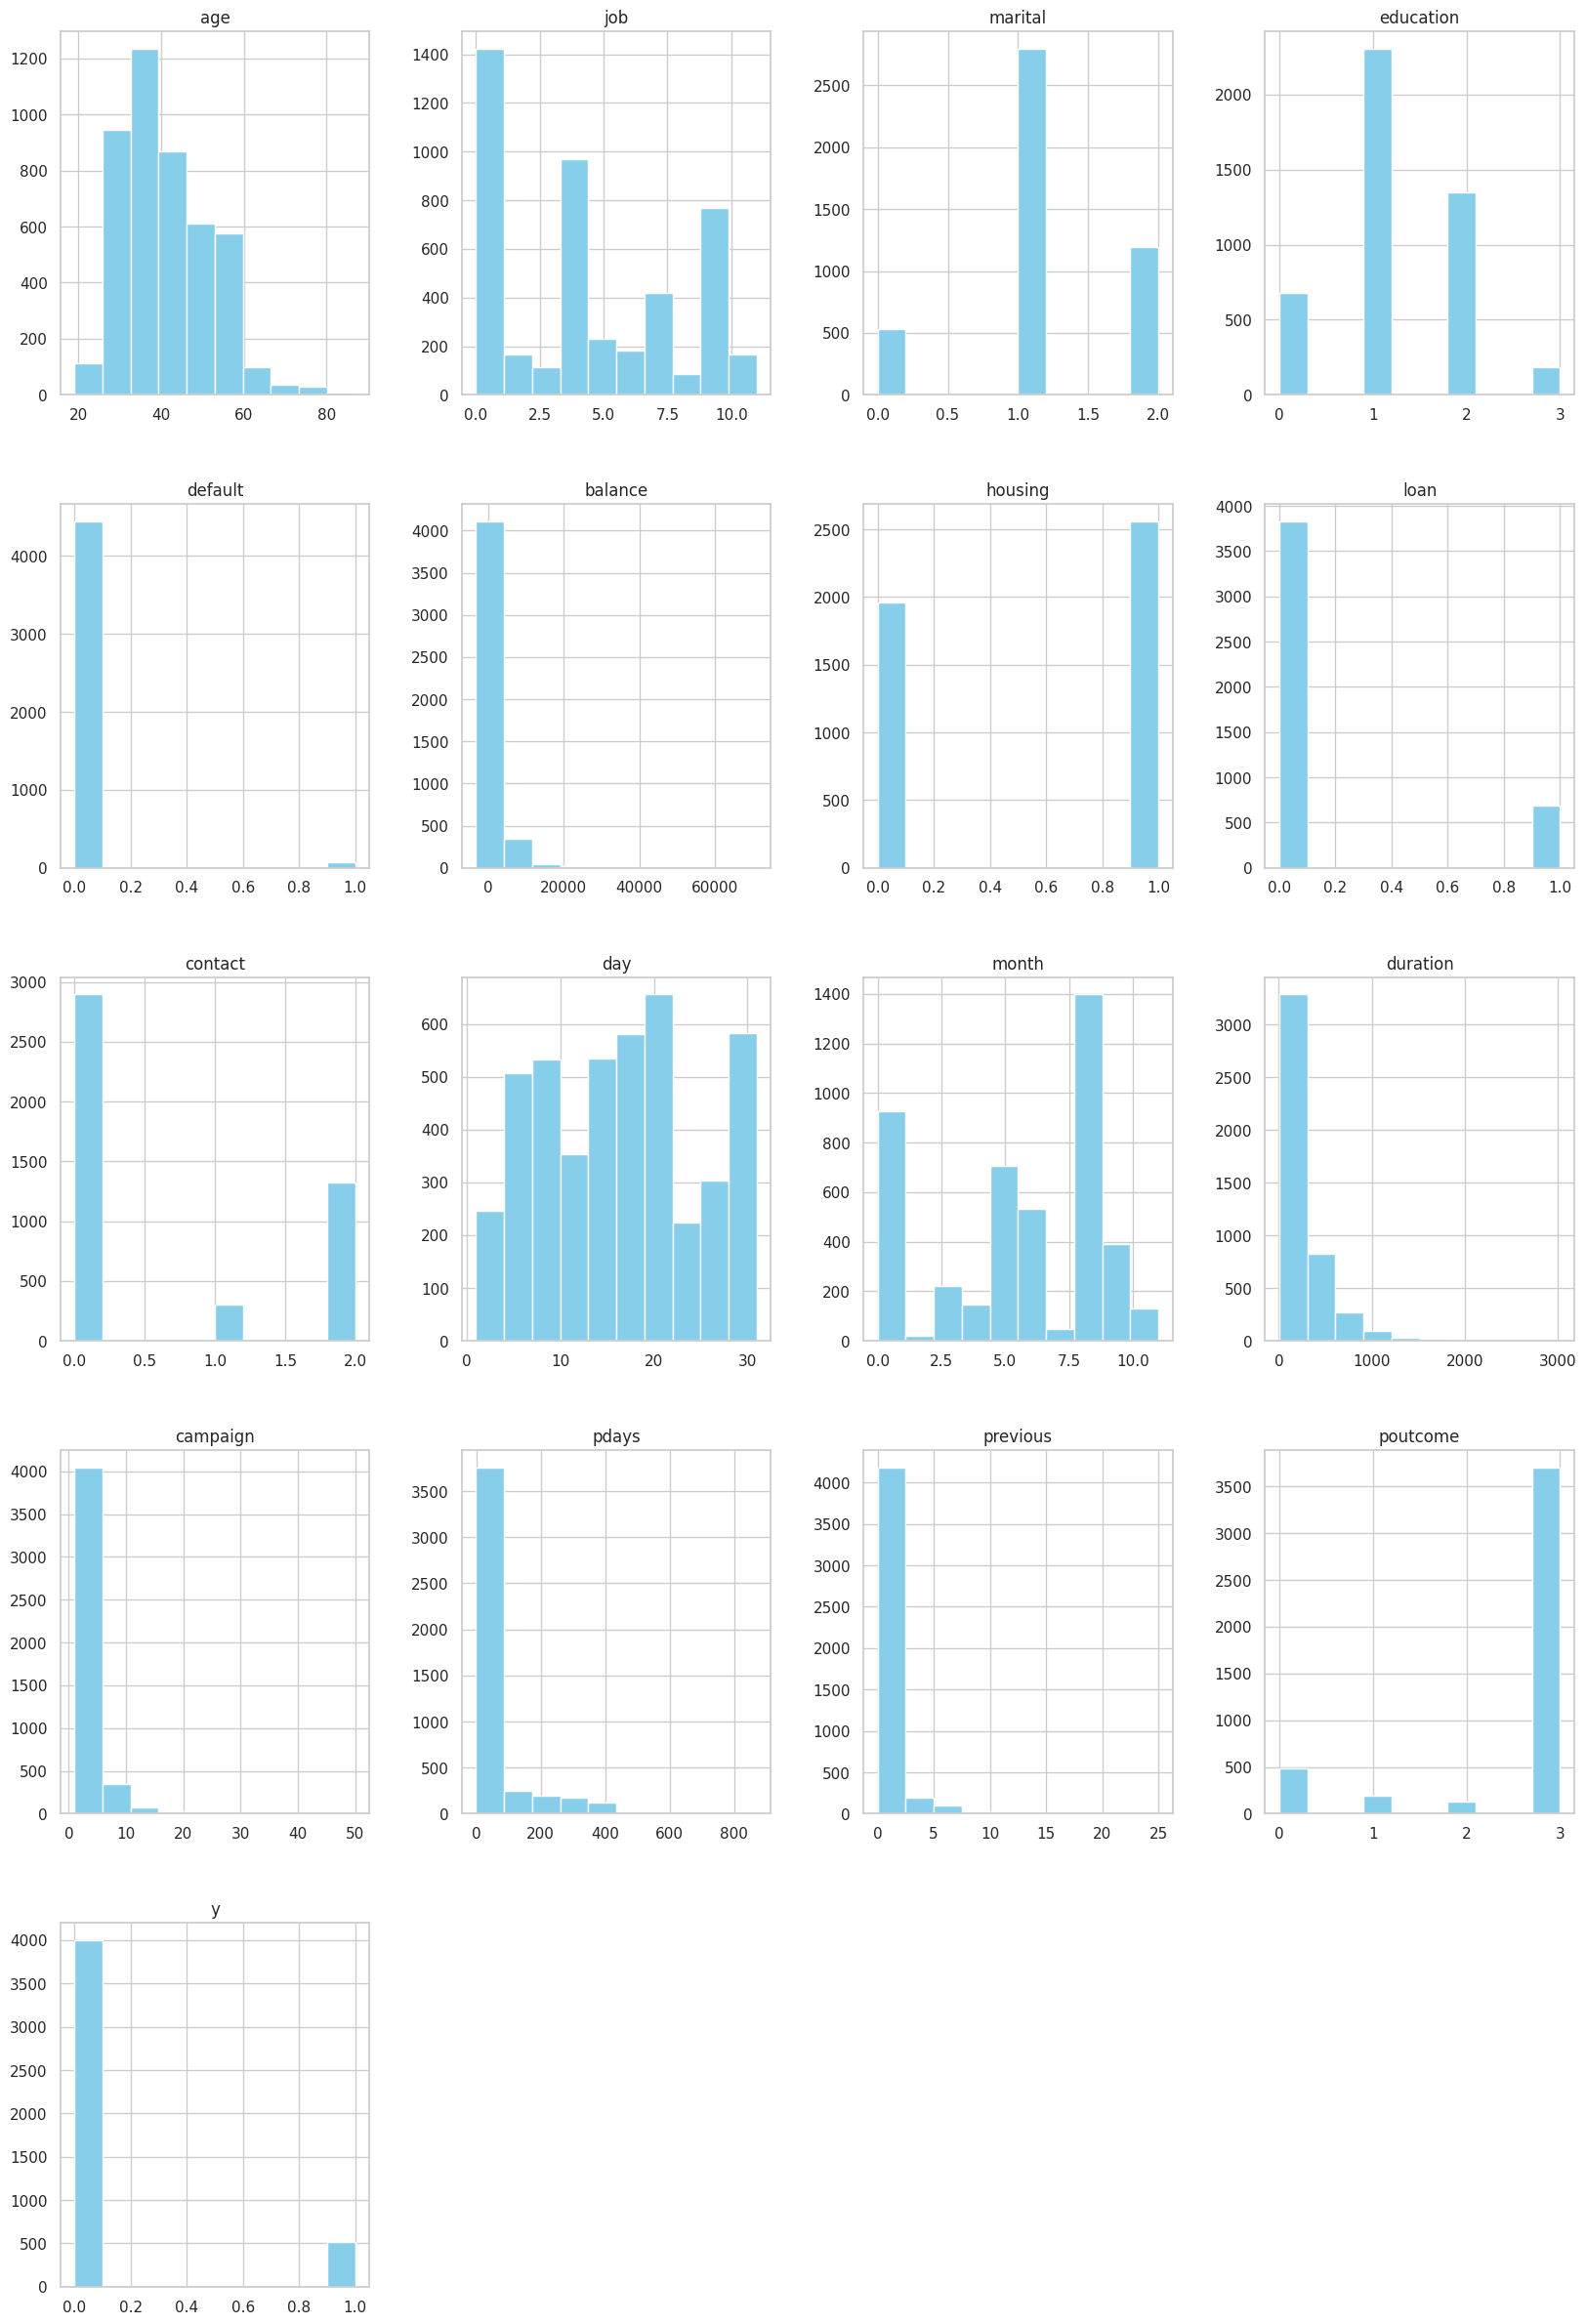

In [ ]:
df.hist(figsize=(20,30), color='skyblue')
plt.show()

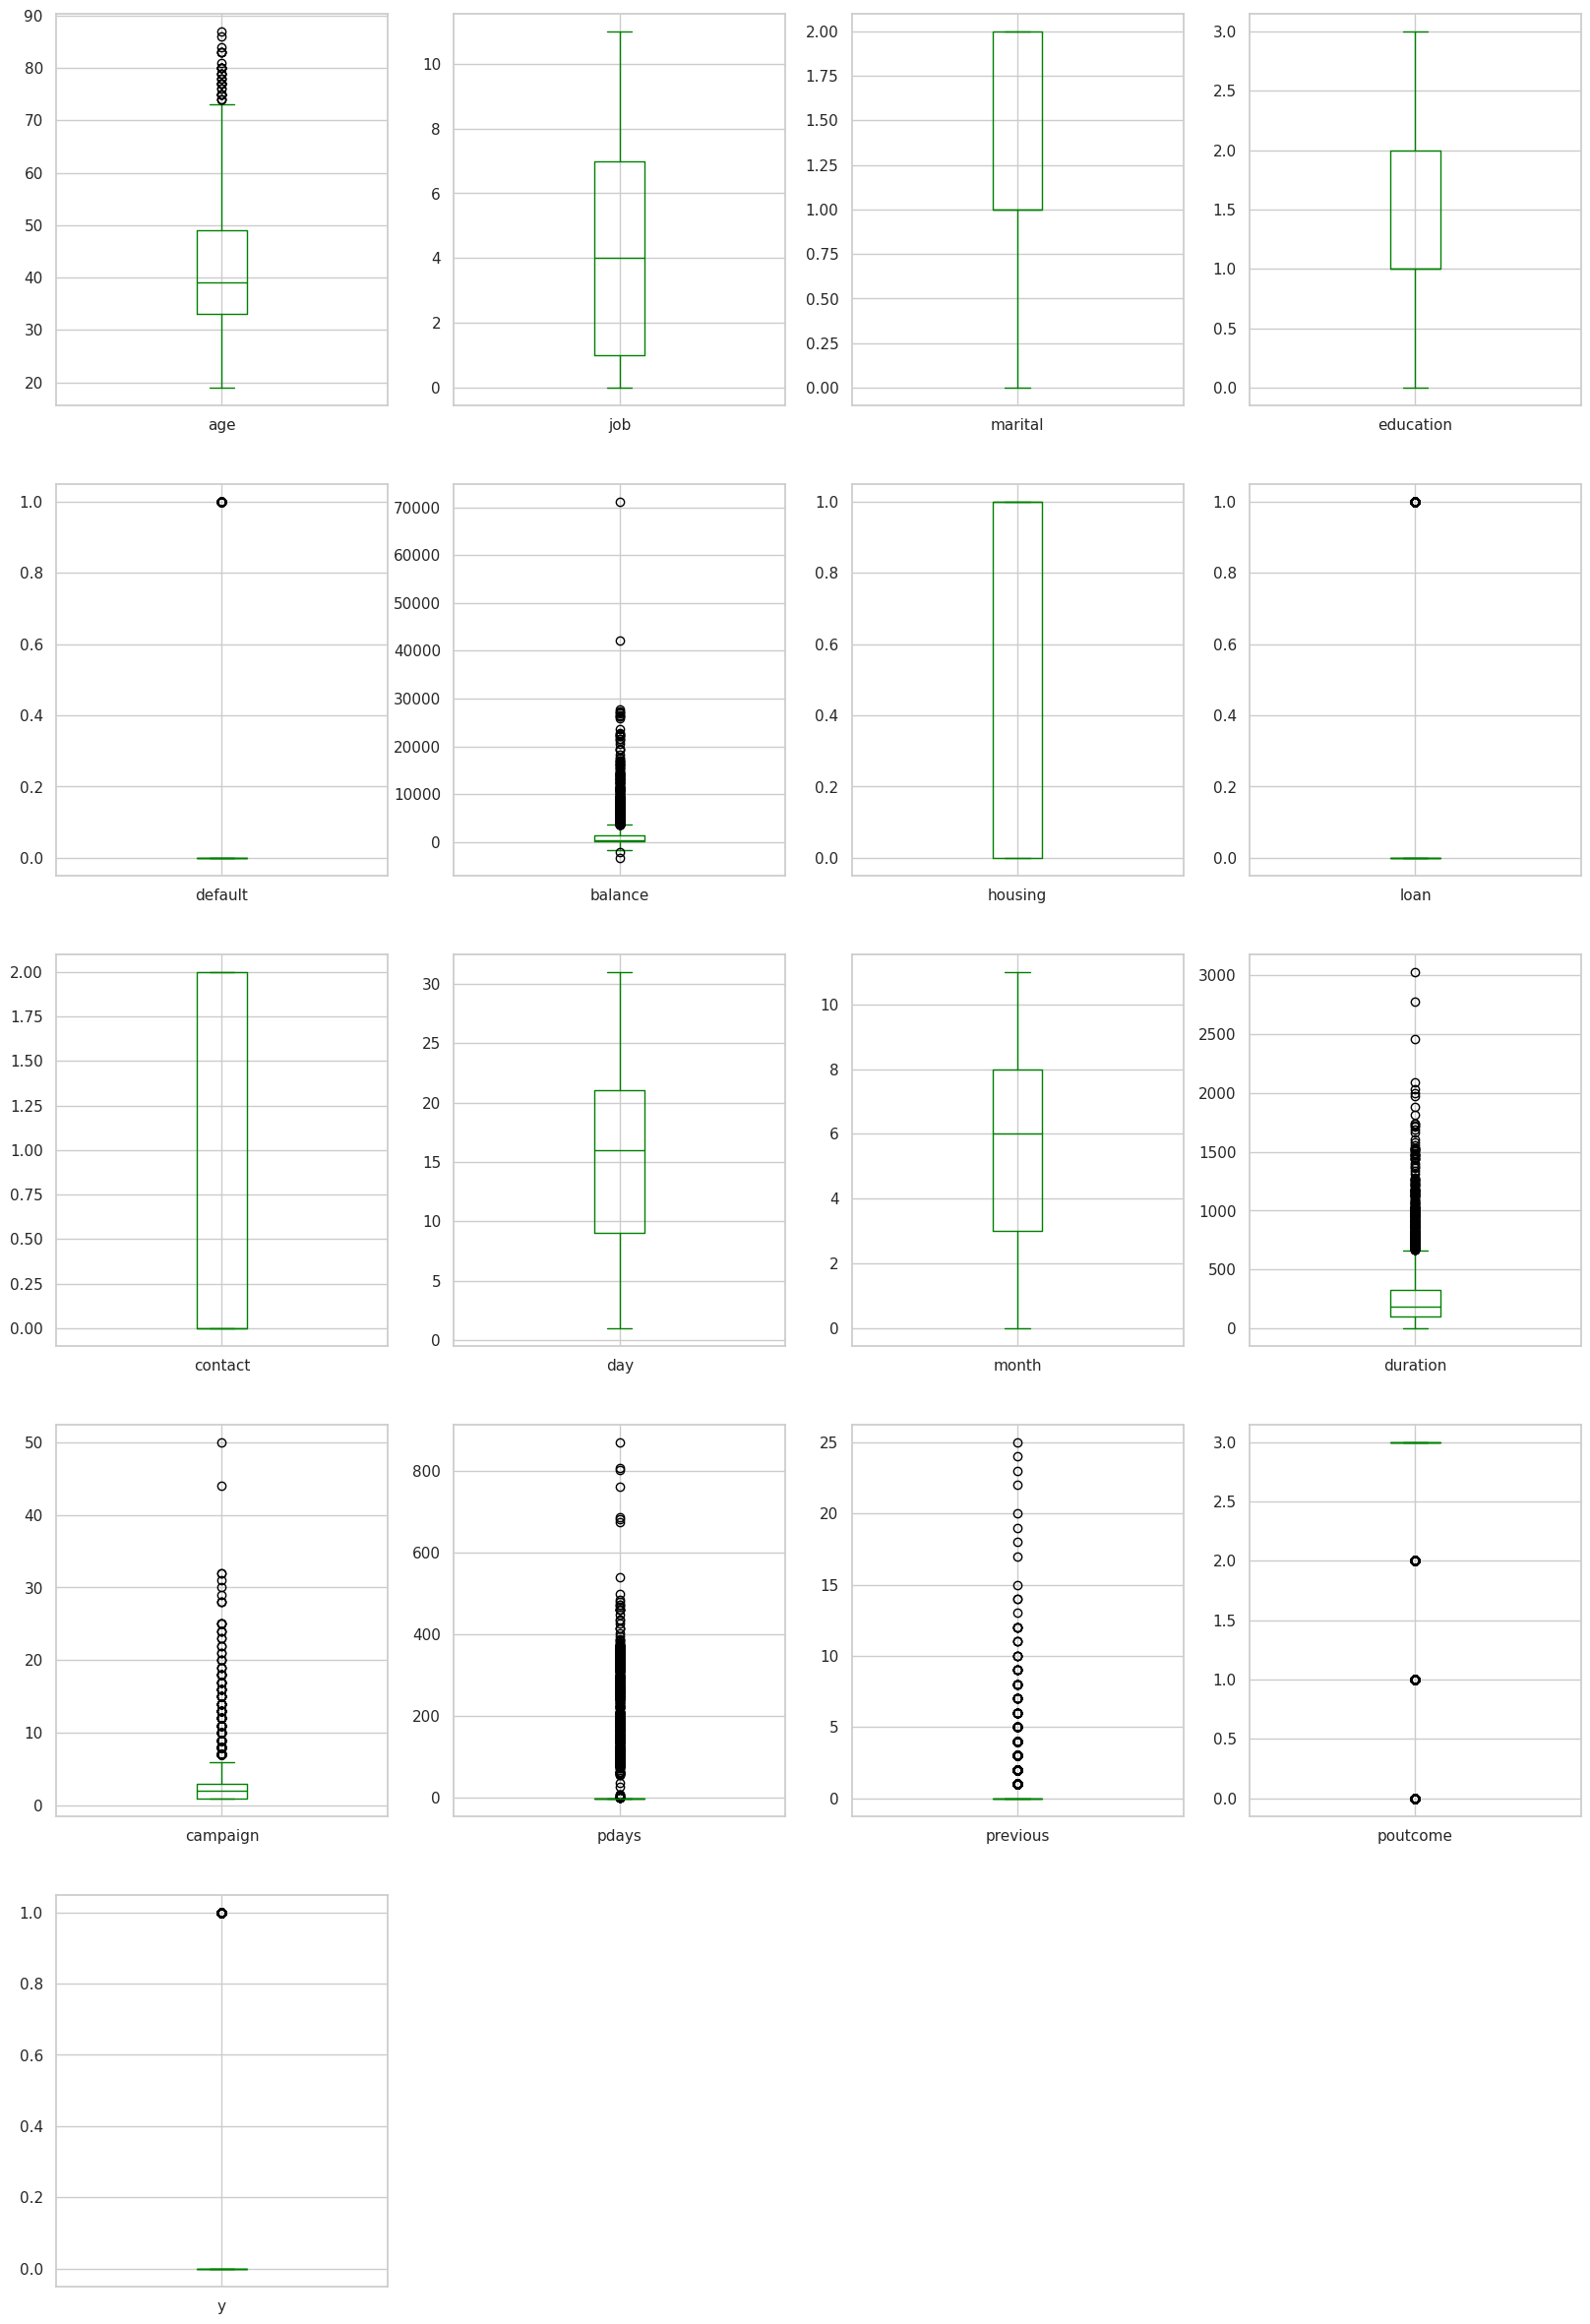

In [ ]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(20,30), color='green')
plt.show()

In [ ]:
df_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded.corr()['y'].sort_values(ascending=False)


,y
y,1.000000
duration,0.401118
previous,0.116714
pdays,0.104087
age,0.045092
education,0.042987
job,0.027401
balance,0.017905
marital,0.015042
default,0.001303
